In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Feature_Selection.csv')
df.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income,Approved
0,1,3.04,6,560.000000,1
1,1,1.50,0,824.000000,1
2,1,3.75,5,3.000000,1
3,1,1.71,0,322.159652,1
4,1,2.50,0,322.159652,1


In [4]:
#### Independent And Dependent features
X=df.drop('Approved',axis=1)
y=df['Approved']

In [5]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
df_classifier=DecisionTreeClassifier().fit(X_train,y_train)
prediction=df_classifier.predict(X_test)

In [7]:
from sklearn import tree

[Text(714.0366697416974, 527.6117647058824, 'X[0] <= 0.5\ngini = 0.493\nsamples = 551\nvalue = [308, 243]'),
 Text(373.7158671586716, 495.63529411764705, 'X[1] <= 5.625\ngini = 0.134\nsamples = 263\nvalue = [244, 19]'),
 Text(228.55350553505536, 463.6588235294118, 'X[1] <= 0.062\ngini = 0.124\nsamples = 257\nvalue = [240, 17]'),
 Text(123.54243542435425, 431.6823529411765, 'X[3] <= 1347.0\ngini = 0.225\nsamples = 62\nvalue = [54, 8]'),
 Text(74.12546125461255, 399.7058823529412, 'X[3] <= 311.08\ngini = 0.183\nsamples = 59\nvalue = [53, 6]'),
 Text(49.4169741697417, 367.7294117647059, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(98.8339483394834, 367.7294117647059, 'X[3] <= 336.58\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(74.12546125461255, 335.7529411764706, 'X[2] <= 0.5\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(49.4169741697417, 303.7764705882353, 'X[1] <= 0.02\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(24.70848708487085, 271.8, 'gini = 0.332\

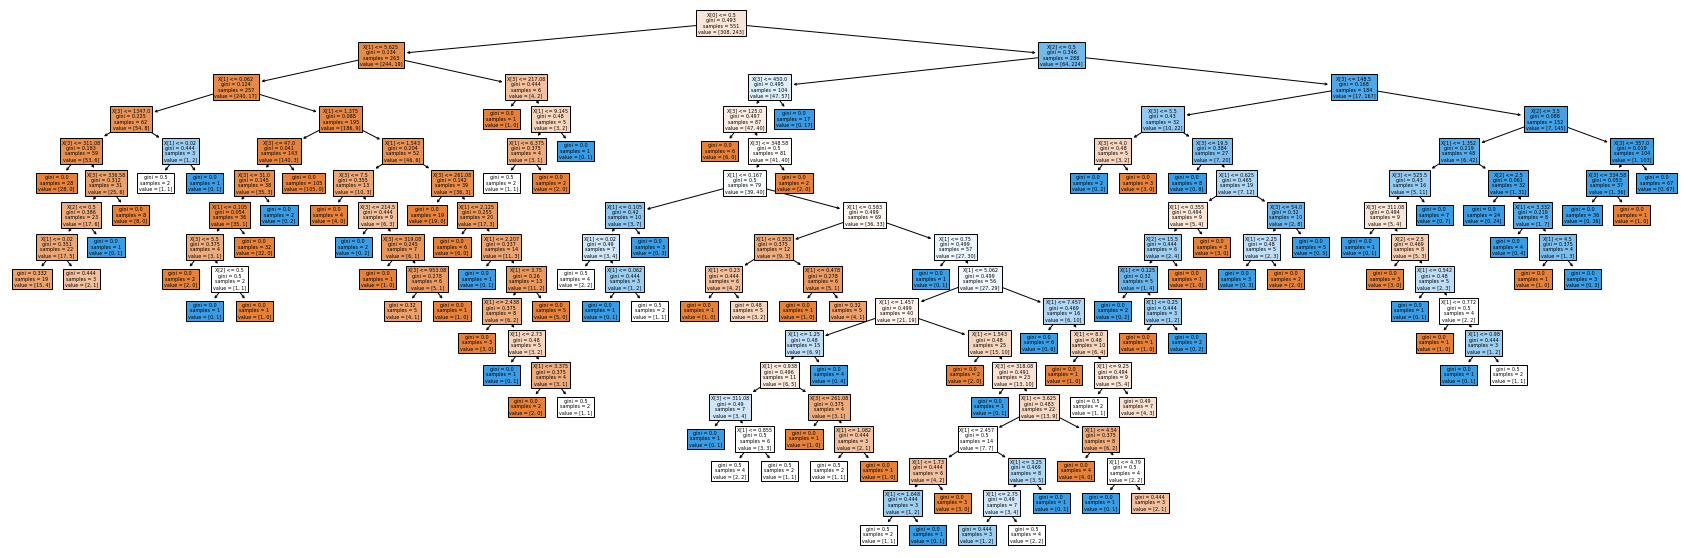

In [8]:
plt.figure(figsize=(30,10))
tree.plot_tree(df_classifier,filled=True)

In [9]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(f'confusion matrix : {confusion_matrix(y_test,prediction)}')
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(classification_report(y_test,prediction))

confusion matrix : [[63 12]
 [19 44]]
Accuracy Score : 0.7753623188405797
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        75
           1       0.79      0.70      0.74        63

    accuracy                           0.78       138
   macro avg       0.78      0.77      0.77       138
weighted avg       0.78      0.78      0.77       138



In [10]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
 "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
 "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
Classifier=DecisionTreeClassifier()

In [12]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
df_random = RandomizedSearchCV(estimator = Classifier, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [13]:
df_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=50, max_features=sqrt, max_depth=10 
[CV]  splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=50, max_features=sqrt, max_depth=10, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=50, max_features=sqrt, max_depth=10 
[CV]  splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=50, max_features=sqrt, max_depth=10, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=50, max_features=sqrt, max_depth=10 
[CV]  splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=50, max_features=sqrt, max_depth=10, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=50, max_features=sqrt, max_depth=10 
[CV]  splitter=best, min_weight_fracti

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=3, max_leaf_nodes=50, max_features=sqrt, max_depth=3, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=3, max_leaf_nodes=50, max_features=sqrt, max_depth=3 
[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=3, max_leaf_nodes=50, max_features=sqrt, max_depth=3, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=3, max_leaf_nodes=50, max_features=sqrt, max_depth=3 
[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=3, max_leaf_nodes=50, max_features=sqrt, max_depth=3, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=60, max_features=auto, max_depth=8 
[CV]  splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=60, max_features=auto, max_depth=8, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=4, max_leaf_nodes=60, max_

[CV]  splitter=random, min_weight_fraction_leaf=0.3, min_samples_leaf=4, max_leaf_nodes=50, max_features=log2, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.3, min_samples_leaf=4, max_leaf_nodes=50, max_features=log2, max_depth=10 
[CV]  splitter=random, min_weight_fraction_leaf=0.3, min_samples_leaf=4, max_leaf_nodes=50, max_features=log2, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=40, max_features=None, max_depth=4 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=40, max_features=None, max_depth=4, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=40, max_features=None, max_depth=4 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=40, max_features=None, max_depth=4, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_

[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=70, max_features=None, max_depth=8, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=70, max_features=None, max_depth=8 
[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=70, max_features=None, max_depth=8, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=None, max_features=None, max_depth=12 
[CV]  splitter=best, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=None, max_features=None, max_depth=12, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=None, max_features=None, max_depth=12 
[CV]  splitter=best, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=None, max_features=None, max_depth=12, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_no

[CV]  splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=40, max_features=auto, max_depth=5, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=1, max_leaf_nodes=50, max_features=auto, max_depth=15 
[CV]  splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=1, max_leaf_nodes=50, max_features=auto, max_depth=15, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=1, max_leaf_nodes=50, max_features=auto, max_depth=15 
[CV]  splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=1, max_leaf_nodes=50, max_features=auto, max_depth=15, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=1, max_leaf_nodes=50, max_features=auto, max_depth=15 
[CV]  splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=1, max_leaf_nodes=50, max_features=auto, max_depth=15, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=1, m

[CV]  splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=10, max_features=auto, max_depth=12, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=10, max_features=auto, max_depth=12 
[CV]  splitter=best, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=10, max_features=auto, max_depth=12, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=70, max_features=None, max_depth=3 
[CV]  splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=70, max_features=None, max_depth=3, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=70, max_features=None, max_depth=3 
[CV]  splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=70, max_features=None, max_depth=3, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_n

[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=70, max_features=None, max_depth=15, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=None, max_depth=10 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=None, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=None, max_depth=10 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=None, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=None, max_depth=10 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=None, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, 

[CV]  splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=60, max_features=log2, max_depth=5, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=60, max_features=log2, max_depth=5 
[CV]  splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=60, max_features=log2, max_depth=5, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=60, max_features=log2, max_depth=5 
[CV]  splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=60, max_features=log2, max_depth=5, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=60, max_features=log2, max_depth=5 
[CV]  splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=60, max_features=log2, max_depth=5, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=50, ma

[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=log2, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=log2, max_depth=10 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=log2, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=log2, max_depth=10 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=log2, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=log2, max_depth=10 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, max_leaf_nodes=30, max_features=log2, max_depth=10, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=5, 

[CV] splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=40, max_features=log2, max_depth=15 
[CV]  splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=40, max_features=log2, max_depth=15, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=40, max_features=log2, max_depth=15 
[CV]  splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=40, max_features=log2, max_depth=15, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=3, max_leaf_nodes=10, max_features=None, max_depth=3 
[CV]  splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=3, max_leaf_nodes=10, max_features=None, max_depth=3, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=3, max_leaf_nodes=10, max_features=None, max_depth=3 
[CV]  splitter=best, min_weight_fraction_leaf=0.1, min_samples_leaf=3, max_leaf_nodes=10, max_fe

[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=2, max_leaf_nodes=50, max_features=sqrt, max_depth=12, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=2, max_leaf_nodes=50, max_features=sqrt, max_depth=12 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=2, max_leaf_nodes=50, max_features=sqrt, max_depth=12, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=2, max_leaf_nodes=50, max_features=sqrt, max_depth=12 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=2, max_leaf_nodes=50, max_features=sqrt, max_depth=12, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=2, max_leaf_nodes=50, max_features=sqrt, max_depth=12 
[CV]  splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=2, max_leaf_nodes=50, max_features=sqrt, max_depth=12, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.1, min_samples_leaf=2, 

[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=30, max_features=auto, max_depth=8, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=30, max_features=auto, max_depth=8 
[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=30, max_features=auto, max_depth=8, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=30, max_features=auto, max_depth=8 
[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=30, max_features=auto, max_depth=8, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=30, max_features=auto, max_depth=8 
[CV]  splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=30, max_features=auto, max_depth=8, total=   0.0s
[CV] splitter=best, min_weight_fraction_leaf=0.3, min_samples_leaf=5, max_leaf_nodes=30, max_

[CV]  splitter=random, min_weight_fraction_leaf=0.2, min_samples_leaf=4, max_leaf_nodes=20, max_features=sqrt, max_depth=4, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=30, max_features=auto, max_depth=5 
[CV]  splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=30, max_features=auto, max_depth=5, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=30, max_features=auto, max_depth=5 
[CV]  splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=30, max_features=auto, max_depth=5, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=30, max_features=auto, max_depth=5 
[CV]  splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_leaf_nodes=30, max_features=auto, max_depth=5, total=   0.0s
[CV] splitter=random, min_weight_fraction_leaf=0.4, min_samples_leaf=2, max_lea

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.1s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [14]:
df_random.best_params_

{'splitter': 'random',
 'min_weight_fraction_leaf': 0.1,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 40,
 'max_features': None,
 'max_depth': 8}

In [15]:
best_random_grid=df_random.best_estimator_

In [16]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[62 13]
 [ 4 59]]
Accuracy Score 0.8768115942028986
Classification report:               precision    recall  f1-score   support

           0       0.94      0.83      0.88        75
           1       0.82      0.94      0.87        63

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



In [17]:
import pickle

 # save the model to disk
filename = 'finalized_model_DT.sav'
pickle.dump(df_random, open(filename, 'wb'))